### Student Number: XXXXXX {-}

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize

In [2]:
data = pd.read_csv("trumptweets_sp500.csv")
tweets = data['content'].values.tolist()

## Problem 1 {-}

The combine() function is made, using word_tokenize to divide into list of substring.

In [3]:
def combine(data):
    return word_tokenize(" ".join(tweets).lower())

In [4]:
trump_tweets = combine(data)
print(trump_tweets[:20])

['...', 'a', 'great', 'person', 'inspires', 'others', 'to', 'see', 'for', 'themselves', '.', '–', 'harvey', 'mackay', 'a', 'mediocre', 'person', 'tells', '.', 'a']


Usually some cleaning of the text would be done, but it is not asked for in the problem description. This would for example be to remove string containing punctuation, numeric strings and/or special characters. Perhaps it will be needed later, but is on purpose not done yet. 

## Problem 2 {-}

### 2.1 {-}

In [5]:
total_words = len(trump_tweets)
print(total_words)

437592


len() Shows number of words, by seeing length of list (number of strings). Number of words is 437592.

In [6]:
trump_vocabulary = len(set(trump_tweets))
print(trump_vocabulary)

32170


len(set()) shows the number unique words in trumps tweets. The size of the vocabulary is 32170.

The lexical diversity is:

In [7]:
def lexical_diversity(text):
    return len(text) / len(set(text))

lexical_diversity(trump_tweets)

13.602486788933788

This means that on average, Trump uses the same words 13,6 times.

### 2.2 {-}
A function is made to calculate the lexical diversity in the brown corpus.

In [8]:
import nltk
from nltk.corpus import brown

In [9]:
def lexical_diversity(text):
    return len(text) / len(set(text))

In [10]:
diversities = {}
for genre in brown.categories():
    diversities[genre] = lexical_diversity(brown.words(categories=genre))
    
diversities

{'adventure': 7.814063556457065,
 'belles_lettres': 9.396666847619565,
 'editorial': 6.22891809908999,
 'fiction': 7.362717695119329,
 'government': 8.570712626818237,
 'hobbies': 6.899455383326351,
 'humor': 4.324297388877816,
 'learned': 10.788777507562726,
 'lore': 7.60525408536165,
 'mystery': 8.188054998567745,
 'news': 6.98582742809504,
 'religion': 6.182174799937235,
 'reviews': 4.718757245536749,
 'romance': 8.284666351159489,
 'science_fiction': 4.475719146303742}

It shows that Trump uses the same words more frequently, than in any of the above brown corpus categories. 
Trump tweets are therefore LESS lexical diverse.

## Problem 3 {-}
### 3.1 {-}
The collocation of trump_tweets is made using BigramCollocationFinder.

In [11]:
from nltk.metrics import BigramAssocMeasures as bam
from nltk.collocations import BigramCollocationFinder as bcf

In [12]:
collocation = bcf.from_words(trump_tweets)
collocation.nbest(bam.likelihood_ratio, 20)

[('``', '@'),
 ('@', 'realdonaldtrump'),
 ('http', ':'),
 ("''", '``'),
 (':', '@'),
 ('thank', 'you'),
 ('’', 's'),
 ('will', 'be'),
 ('https', ':'),
 ('!', '``'),
 ('donald', 'trump'),
 ('#', 'trump2016'),
 ('do', "n't"),
 ('ca', "n't"),
 ('.', "''"),
 ('!', "''"),
 ('for', 'president'),
 ('make', 'america'),
 ('’', 't'),
 ('#', 'makeamericagreatagain')]

The results indicates, that cleaning of the data is required for better output. The function .isalnum() is used for this.

In [13]:
cleaned_tweets = []

for words in tweets:
    words = words.split()
    onlywords = [words for words in words if words.isalnum()]
    for i in onlywords:
        if i != "":
            cleaned_tweets.append(i)

In [14]:
collocation = bcf.from_words(cleaned_tweets)
collocation.nbest(bam.likelihood_ratio, 10)

[('will', 'be'),
 ('Thank', 'you'),
 ('MAKE', 'AMERICA'),
 ('Donald', 'Trump'),
 ('I', 'am'),
 ('AMERICA', 'GREAT'),
 ('of', 'the'),
 ('run', 'for'),
 ('a', 'great'),
 ('is', 'a')]

It gives a much better output, because it has removed special characters like @ and #, and urls (http). 
Each string that contained a character that was not a letter was removed with the .isalnum() function.

### 3.2 {-}

In [15]:
bigram_list = list(nltk.bigrams(cleaned_tweets))
nltk.FreqDist(bigram_list)

FreqDist({('of', 'the'): 978, ('will', 'be'): 746, ('in', 'the'): 731, ('is', 'a'): 633, ('Thank', 'you'): 629, ('for', 'the'): 533, ('to', 'the'): 458, ('a', 'great'): 436, ('to', 'be'): 432, ('on', 'the'): 403, ...})

Some of the collocations and bigrams are the same, which makes sense. The bigram lists the most frequent occuring of two connected words, whereas the collocation gives a score that implies how much meaning is givin by two connected words. So the bigram 'to' 'the' may occur many times (top10 bigrams), but it is not in the collocations top 10, because it does not imply enough meaning, like perhaps 'AMERICA' 'GREAT', does. 

### 3.3 {-}
Stemming is done using the PortStemmer function from nltk. 

In [16]:
portstemmer = nltk.PorterStemmer()
stemmedlist = [portstemmer.stem(i) for i in cleaned_tweets]
len(set(list(stemmedlist)))

11744

The stemmed vocabulary is 11744 words long. 

In [17]:
trump_vocabulary - len(set(list(stemmedlist)))

20426

The porter stemmer attempts to reduce each word in the input text to its' root. So if there for example are am, are, is, they can all be stemmed to the root. That root could for example be am, and 3 words are now reduced to 1 in the vocabulary. 

Stemming the text in this case, decreases the vocabulary from 32170 to 11744. So a drop of 20426. 

## Problem 4 {-}
### 4.1 {-}

A function is made, which takes a generic text input and then outputs a frequency distribution of the tags. 

In [18]:
from nltk.probability import FreqDist

In [19]:
def freq(text):
    tags = nltk.FreqDist(tag for(word, tag) in text)
    return tags

The function is tested on the brown news corpus.

In [20]:
freq(brown.tagged_words(categories='news', tagset='universal'))

FreqDist({'NOUN': 30654, 'VERB': 14399, 'ADP': 12355, '.': 11928, 'DET': 11389, 'ADJ': 6706, 'ADV': 3349, 'CONJ': 2717, 'PRON': 2535, 'PRT': 2264, ...})

### 4.2 {-}

In [21]:
from nltk.tag import UnigramTagger
from nltk.corpus import brown

A training set is made from the news category of the brown corpus. The tagset universal is chosen.

In [22]:
train_words = brown.tagged_words(categories='news', tagset='universal')

The training set is run through the UnigramTagger function, which finds the most likely tag for reach word.

In [23]:
uni_tag = UnigramTagger([train_words])

A function is made, that plots the frequency distribution of tags. 

In [24]:
def displot(wordtag, words):
    word_tags = wordtag.tag(words)
    _, tags = zip(*word_tags)
    return pd.Series(tags).value_counts(dropna = False).plot()

<AxesSubplot:>

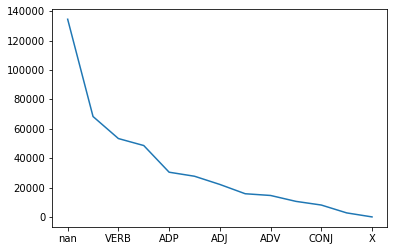

In [25]:
displot(uni_tag,trump_tweets)

### 4.3 {-}
One reason there are alot of nan or none, is because the data has not been cleaned. So many of the list entries are numbers, special characters and/or words that it cannot classify. 

Another reason can for example be because Trump has spelled a word wrong. Then the Unitagger is not able to classify the word, as it does not know it. 

In [26]:
_, train_tags = zip(*train_words)
pd.Series(train_tags).value_counts()[:1]

NOUN    30654
dtype: int64

The most common tag in news is NOUN. It is used as backoff below.

In [27]:
uni_tag_with_backoff = UnigramTagger([train_words],backoff = nltk.DefaultTagger('NOUN'))

The plot function from 4.2 is used again.

<AxesSubplot:>

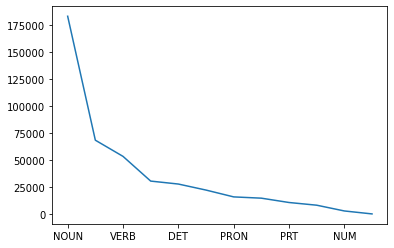

In [28]:
displot(uni_tag_with_backoff,trump_tweets)

## Problem 5 {-}

### 5.1 {-}
The data is loaded into a dataframe, and a column with binary_indicator is added. The binary indicator shows 1 if the returns were positive, and 0 if the returns were negative.

In [29]:
df = pd.read_csv('trumptweets_sp500.csv')
df['binary_indicator'] = np.where(df.SP500_daily_returns > 0, 1, 0)

### 5.2 {-}

In [30]:
import datetime

Datatime and pandas is used to split the data into training, test and devtest sets, following instructions from the assignment. 

In [31]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df['date'])

In [32]:
traindates = df.loc[df.date < '2015-12-31']
devtdates = df.loc[(df.date >= '2016-01-01') & (df.date < '2016-12-31')]
testdates = df.loc[df.date >= '2017-01-01']

Here only columns that contains relevant information are kept (content, returns and binary indicator).

In [33]:
train_set = traindates.iloc[:,[2,6,7]]
devt_set = devtdates.iloc[:,[2,6,7]]
test_set = testdates.iloc[:,[2,6,7]]

### 5.3 {-}

The feature selector is tested on the trump_tweets dataset, which is the original not cleaned tweet data.

In [34]:
all_words = nltk.FreqDist(w.lower() for w in trump_tweets)
word_features = list(all_words)[:100]

def document_features (document, word_features):
    document_words = set(document)
    features = {}
    for word in word_features :
        features['contains({}) '.format(word)] = (word in document_words)
    return features

A function is made, to make it easier to tokenize the datasets, since this will be done many times. This is needed for using the data in the classifier and for making predictions. 

In [35]:
def token_data(df, word_featurs):
    return df.apply(lambda i: (document_features(i.content, word_features), i.binary_indicator),1).values.tolist()

The token_data function is applied to the datasets, using the respective dataset and the word_features as input.

In [36]:
train_tokens = token_data(train_set, word_features)
devt_tokens = token_data(devt_set, word_features)
test_tokens = token_data(test_set, word_features)

The NaiveBayesClassifier is trained, using the training data. 

In [37]:
classifier = nltk.NaiveBayesClassifier.train(train_tokens)
classifier.show_most_informative_features(10)

Most Informative Features
            contains(…)  = True                0 : 1      =      1.2 : 1.0
            contains(?)  = True                1 : 0      =      1.2 : 1.0
            contains(#)  = True                0 : 1      =      1.1 : 1.0
            contains(()  = True                1 : 0      =      1.1 : 1.0
            contains(s)  = False               0 : 1      =      1.1 : 1.0
            contains(!)  = True                1 : 0      =      1.0 : 1.0
            contains(!)  = False               0 : 1      =      1.0 : 1.0
            contains(.)  = False               1 : 0      =      1.0 : 1.0
            contains(@)  = False               0 : 1      =      1.0 : 1.0
            contains())  = True                1 : 0      =      1.0 : 1.0


The output of 10 most informative features show, why it can be necessary to clean data. All of the supposed most informative tokens are special characters. This also gives an indication, that there is not really much that can be predicted on the SP500 using the tweets, but it remains to be seen. 

### 5.4 {-}

In [38]:
from nltk.metrics import ConfusionMatrix

A prediction and y variable is made, to test how the classifer, which was trained on training data, performs on the development test data. 

In [39]:
bayes_preds = [classifier.classify(i) for i , _ in devt_tokens]
y_devt = [(y) for _, y in devt_tokens]

In [40]:
print(nltk.classify.accuracy(classifier, devt_tokens))
print(ConfusionMatrix(bayes_preds ,y_devt))

0.526813880126183
  |    0    1 |
--+-----------+
0 | <164> 227 |
1 | 1123<1339>|
--+-----------+
(row = reference; col = test)



The confusion matrix shows, that the predictor has a tendency to predict 1, where it 1123 times predict 1, when it should have been 0. 1339 times  it correctly predicts 1. 
It predicts 0 correctly 164 times and wrong 227 times.

### 5.5 {-}

The first model was made using uncleaned tweet data. An obvious way to try improving the model, would be to use cleaned data. A clean data set was made in 3.1, called cleaned_tweets, which will be called again. At the same time, stopwords will also be removed, as they are not expected to add predictive power, but excepted to add noise.

In [41]:
from nltk.corpus import stopwords

In [42]:
all_stopwords = stopwords.words('english')
no_stopwords = [word for word in cleaned_tweets if not word in all_stopwords]

In [43]:
all_words = FreqDist(w.lower () for w in no_stopwords) 
word_features = list(all_words)[:100]

In [44]:
imp_train = token_data(train_set, word_features)
imp_devt = token_data(devt_set, word_features)
imp_test = token_data(test_set, word_features)

In [45]:
classifier_clean = nltk.NaiveBayesClassifier.train(imp_train)
classifier_clean.show_most_informative_features(10)

Most Informative Features
            contains(i)  = False               1 : 0      =      1.0 : 1.0
            contains(a)  = False               1 : 0      =      1.0 : 1.0
            contains(i)  = True                0 : 1      =      1.0 : 1.0
            contains(a)  = True                0 : 1      =      1.0 : 1.0
       contains(always)  = False               0 : 1      =      1.0 : 1.0
      contains(amazing)  = False               0 : 1      =      1.0 : 1.0
      contains(america)  = False               0 : 1      =      1.0 : 1.0
     contains(american)  = False               0 : 1      =      1.0 : 1.0
         contains(back)  = False               0 : 1      =      1.0 : 1.0
          contains(bad)  = False               0 : 1      =      1.0 : 1.0


This shows that using cleansed data give informative features, that appears to make more sense. Instead of special characters, there are actual words. This does not guarentee a better model, and in might be that it is the same or worse. 

In [46]:
bayes_preds_imp = [classifier_clean.classify(i) for i , _ in imp_devt]
y_devt_imp = [(y) for _, y in imp_devt]

In [47]:
print(nltk.classify.accuracy(classifier_clean, imp_devt))
print(ConfusionMatrix(bayes_preds_imp ,y_devt_imp))

0.5488958990536278
  |    0    1 |
--+-----------+
0 |   <.>   . |
1 | 1287<1566>|
--+-----------+
(row = reference; col = test)



It only marginally improves the accuracy. This indicates that trumps tweets does not have a noticeably effect on stocks.
Therefore they are not generally suited to base a prediction model on. It is especially worth noticing, that this new model only wants us to hold (UP), because it always expects the value to increase. 

## Problem 6 {-}

In [48]:
classifier_clean = nltk.NaiveBayesClassifier.train(imp_train)

bayes_test_preds = [classifier_clean.classify(i) for i , _ in imp_test]
y_test_imp = [(y) for _, y in imp_test]

print(nltk.classify.accuracy(classifier_clean, imp_test))
print(ConfusionMatrix(bayes_test_preds ,y_test_imp))

0.571975916803503
  |    0    1 |
--+-----------+
0 |   <.>   . |
1 |  782<1045>|
--+-----------+
(row = reference; col = test)



As seen above, if the test data is run through the "improved" model, it still wants to only hold (1). This indicates that it is not able to predict, and just follows the market which generally tends to grow, even though there are ups and downs. The tendency to grow over time is especially evident in an index fund, which the SP500 must be interpreted to represent. (An index fund covering the SP500).

A trading strategy will instead be made using the model from 5.4, because it also predict some selling (1). If the model from 5.5 was used, which only tells to hold, it would be very boring, since the solution would just be to cumsum() all the historical returns from the test set period.  

In [49]:
classifier = nltk.NaiveBayesClassifier.train(train_tokens)

bayes_preds_test = [classifier.classify(i) for i , _ in test_tokens]
y_test = [(y) for _, y in test_tokens]

print(nltk.classify.accuracy(classifier, test_tokens))
print(ConfusionMatrix(bayes_preds_test ,y_test))

0.5697865353037767
  |    0    1 |
--+-----------+
0 |  <33>  37 |
1 |  749<1008>|
--+-----------+
(row = reference; col = test)



The predictions are added to the test set, as a column called 'Pred'.

In [50]:
test_set.insert(2, 'Pred', bayes_preds_test)

Two object are made, one which holds the mean returns for each day. The other holds the mean prediction of each day. This is because each day can appear several times, but it is ideal to group them. The returns will remain the same, but there can be predictions that vary on the same day, where one tweet predict 1 (hold) and another predicts 0 (sell).

In [51]:
test_returns_grouped = test_set.groupby('date').agg({'SP500_daily_returns':'mean'})
test_pred_grouped = test_set.groupby('date').agg({'Pred':'mean'})

The objects are put together into the test_returns_grouped, and a filter is put on the predictions. It only keeps those days, where the prediction mean is above 0,5, which is the decision point of whether to hold or sell. 

In [52]:
test_returns_grouped['Pred'] = test_pred_grouped['Pred']
test_returns_grouped = test_returns_grouped[test_returns_grouped['Pred'] > 0.5]

In [53]:
overall_returns = test_returns_grouped.cumsum()
overall_returns = overall_returns.drop(columns = 'Pred')
overall_returns.tail(1)

,SP500_daily_returns
date,
2018-02-08,0.1445


The trading strategy from the model in 5.4 gives a return in the test data period of 14,45%. To compare, the actual returns of that period will be calculated, to see what the return would have been if no adjustments were made (Hold all the time).

In [54]:
test_hold_all = test_set.groupby('date').agg({'SP500_daily_returns':'mean'})
hold_returns = test_hold_all.cumsum()
hold_returns.tail(1)

,SP500_daily_returns
date,
2018-02-08,0.157931


If the SP500 would have been held throughout the period (similarly to what our 5.5 suggested), the return would have been 15,79%. This is higher than the strategy using the 5.4, and the better option is therefore to only hold, and not try to beat the market. 

It gives the impression that the trump tweets does not have predictive power on the SP500, or at least to such a small extend, that it cannot provide good information for a predictive model.